# Work Lab 3
by Yurii Voievidka

## Task 1

In [110]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import MaxPooling2D,  Flatten, Conv2D, Dense, Dropout
from keras.utils import to_categorical
from keras.models import Sequential

In [111]:
plt.style.use('fivethirtyeight')

In [112]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [113]:
x_train = x_train / 255
x_test = x_test / 255

In [116]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

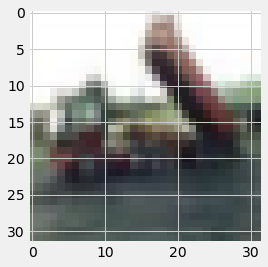

In [117]:
img = plt.imshow(x_train[2])

In [118]:
#Data Augumentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(x_train)

In [119]:
!['image'](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network-1.jpg)

/bin/bash: -c: line 0: syntax error near unexpected token `https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network-1.jpg'
/bin/bash: -c: line 0: `['image'](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network-1.jpg)'


In [120]:

from keras.layers import AveragePooling2D
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [121]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=2)

In [123]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [124]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_val, y_val), steps_per_epoch=x_train.shape[0] // 250, callbacks=[early_stopping])

Epoch 1/10
160/160 [==============================] - 307s 2s/step - loss: 1.9902 - accuracy: 0.2666 - val_loss: 1.6131 - val_accuracy: 0.4142
Epoch 2/10
160/160 [==============================] - 310s 2s/step - loss: 1.5347 - accuracy: 0.4378 - val_loss: 1.3396 - val_accuracy: 0.5135
Epoch 3/10
160/160 [==============================] - 314s 2s/step - loss: 1.3268 - accuracy: 0.5207 - val_loss: 1.2310 - val_accuracy: 0.5611
Epoch 4/10
160/160 [==============================] - 307s 2s/step - loss: 1.1699 - accuracy: 0.5811 - val_loss: 1.0218 - val_accuracy: 0.6347
Epoch 5/10
160/160 [==============================] - 306s 2s/step - loss: 1.0627 - accuracy: 0.6239 - val_loss: 0.9275 - val_accuracy: 0.6668
Epoch 6/10
160/160 [==============================] - 303s 2s/step - loss: 0.9606 - accuracy: 0.6617 - val_loss: 0.8943 - val_accuracy: 0.6847
Epoch 7/10
160/160 [==============================] - 303s 2s/step - loss: 0.8909 - accuracy: 0.6861 - val_loss: 0.8366 - val_accuracy: 0.7050

In [125]:
predictions = model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 20s 65ms/step - loss: 0.7531 - accuracy: 0.7390


In [126]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [135]:
airplane_image = plt.imread('./airplane.jpeg')
automobile_image = plt.imread('./car.jpeg')
bird_image = plt.imread('./bird.jpeg')
cat_image = plt.imread('./cat.jpeg')
deer_image = plt.imread('./deer.jpeg')
dog_image = plt.imread('./pit-bull.jpeg')
frog_image = plt.imread('./frog.jpeg')
horse_image = plt.imread('./horse.png')
ship_image = plt.imread('./ship.jpeg')
truck_image = plt.imread('./truck.jpeg')

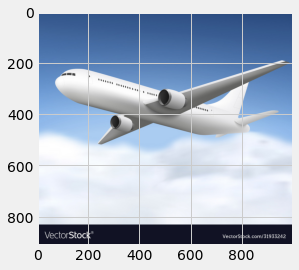

In [128]:
plt.imshow(airplane_image)

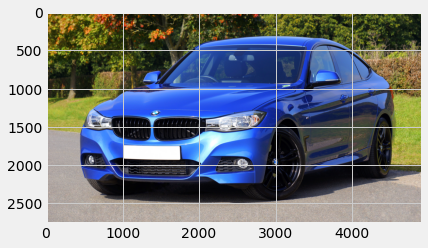

In [129]:
plt.imshow(automobile_image)

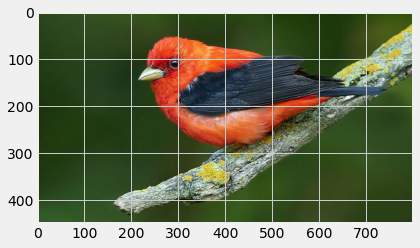

In [21]:
plt.imshow(bird_image)

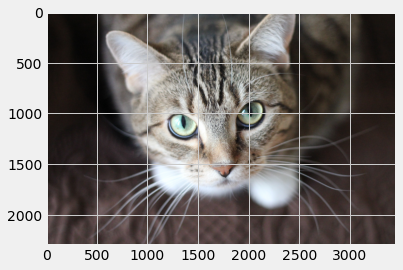

In [22]:
plt.imshow(cat_image)

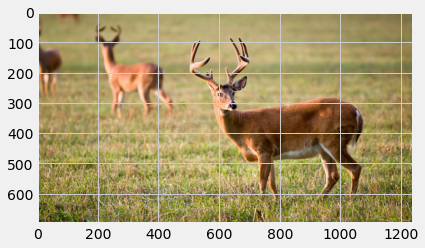

In [23]:
plt.imshow(deer_image)

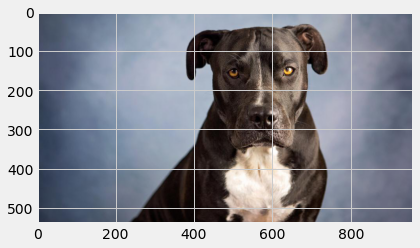

In [136]:
plt.imshow(dog_image)

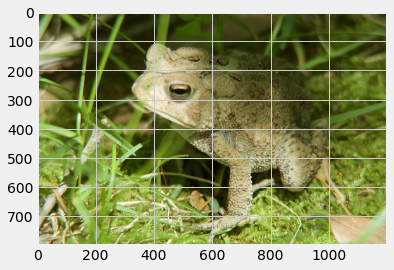

In [25]:
plt.imshow(frog_image)

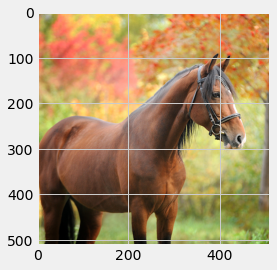

In [26]:
plt.imshow(horse_image)

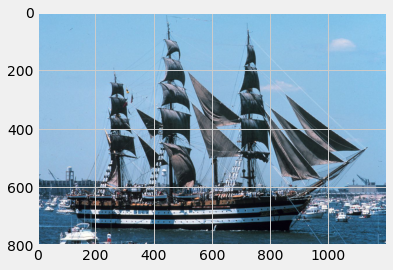

In [27]:
plt.imshow(ship_image)

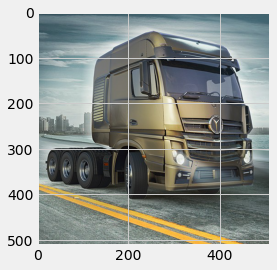

In [28]:
plt.imshow(truck_image)

In [137]:
from skimage.transform import resize
import numpy as np
#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images = [airplane_image, 
automobile_image,
bird_image,
cat_image,
deer_image,
dog_image,
frog_image,
horse_image,
ship_image,
truck_image ]

resized_images = [resize(x, (32,32,3)) for x in images]

In [132]:
predictions = [model.predict(np.array([x])) for x in  resized_images]

1/1 [==============================] - 0s 29ms/step


In [138]:
list_index = [0,1,2,3,4,5,6,7,8,9]
for i in range(10): 
    sorted_middleware_predictions = sorted(predictions[i])
    for j in range(10):
     print(classification[list_index[j]],':',round(sorted_middleware_predictions[0][list_index[j]] * 100, 2))
    print('\n')

airplane : 99.71
automobile : 0.0
bird : 0.23
cat : 0.0
deer : 0.06
dog : 0.0
frog : 0.0
horse : 0.0
ship : 0.01
truck : 0.0


airplane : 0.0
automobile : 99.99
bird : 0.0
cat : 0.0
deer : 0.0
dog : 0.0
frog : 0.0
horse : 0.0
ship : 0.0
truck : 0.01


airplane : 2.91
automobile : 1.59
bird : 85.14
cat : 0.75
deer : 0.28
dog : 8.25
frog : 0.23
horse : 0.13
ship : 0.42
truck : 0.29


airplane : 0.03
automobile : 0.0
bird : 0.28
cat : 94.85
deer : 0.16
dog : 3.81
frog : 0.65
horse : 0.17
ship : 0.01
truck : 0.01


airplane : 0.0
automobile : 0.0
bird : 0.34
cat : 0.01
deer : 99.49
dog : 0.04
frog : 0.0
horse : 0.11
ship : 0.0
truck : 0.0


airplane : 0.0
automobile : 0.0
bird : 0.19
cat : 0.63
deer : 76.74
dog : 7.39
frog : 0.08
horse : 14.96
ship : 0.0
truck : 0.0


airplane : 0.01
automobile : 0.0
bird : 8.6
cat : 0.34
deer : 4.18
dog : 0.48
frog : 86.33
horse : 0.05
ship : 0.0
truck : 0.0


airplane : 0.03
automobile : 0.01
bird : 10.55
cat : 1.17
deer : 69.99
dog : 4.18
frog : 0.08
ho

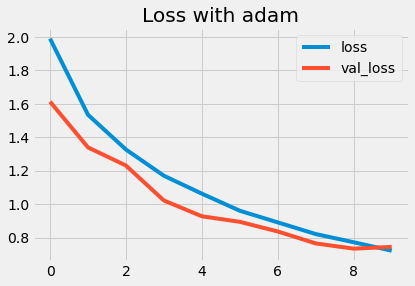

In [139]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss with adam')

In [140]:
model.save('my_model.h5')


## Task 2

## MODEL USED IN TASK ABOVE

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
